Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_data.dropna(inplace=True)
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
heart_data.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

In [12]:
# average number of diagnosed people grouped by number of blood vessels detected by fluoroscopy
heart_data[['ca','target']].groupby('ca').count()

,target
ca,
0,175
1,65
2,38
3,20
4,5


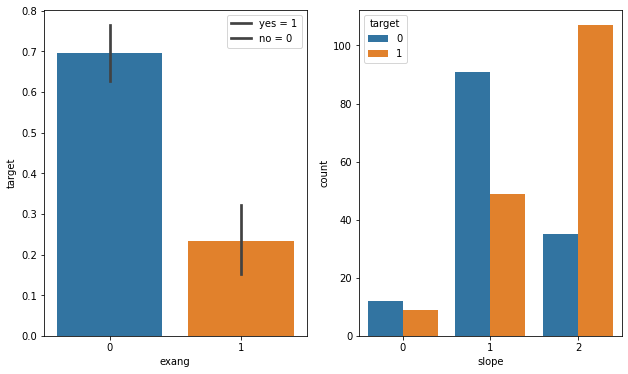

In [13]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
# plt.subplot(131)
# sns.pointplot(x="sex", y="target", hue='cp', data=heart_data)
# plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart_data)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart_data)
plt.show()

#### Observations:

1. Men are much more prone to get a heart disease than women.
2. The higher number of vessels detected through fluoroscopy, the higher risk of disease.
3. While soft chest pain may be a bad symptom of approaching problems with heart (especially in case of men), strong pain is a serious warning!
4. Risk of getting heart disease might be even 3x higher for someone who experienced exercise-induced angina.
5. The flat slope (value=2) and downslope (value=3) of the peak exercise indicates a high risk of getting disease

In [14]:
# sns.pairplot(heart_data)

In [15]:
# fill missing values with mode
heart_data['ca'].fillna(heart_data['ca'].mode()[0], inplace=True)
heart_data['thal'].fillna(heart_data['thal'].mode()[0], inplace=True)

In [16]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


Splitting the Data into Training data & Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(Y_test.shape))

train_set_x shape: (242, 13)
train_set_y shape: (242,)
test_set_x shape: (61, 13)
test_set_y shape: (61,)


In [18]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# print(X)

In [20]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [22]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Accuracy Score

In [23]:
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression,max_iter=300)

Train accuracy: 85.54%
Test accuracy: 90.16%


In [24]:
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 81.40%
Test accuracy: 93.44%


In [25]:
model = train_model(X_train, Y_train, X_test, Y_test, DecisionTreeClassifier)

Train accuracy: 100.00%
Test accuracy: 83.61%


In [26]:
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 86.36%
Test accuracy: 85.25%


In [27]:
# Random Forests
model = train_model(X_train, Y_train, X_test, Y_test, RandomForestClassifier, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 91.80%


In [54]:
input_data = (45,0,0,180,250,1,2,200,0,0.60,2,2,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


Saving the trained model

In [29]:
import pickle
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [30]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


age: Age of the patient in years.
sex: Sex of the patient (1 = male, 0 = female).
cp: Chest pain type experienced by the patient. This is typically classified into four categories:
0: Typical angina (chest pain related to heart)
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic (no chest pain)
trestbps: Resting blood pressure (in mm Hg) measured when the patient was admitted to the hospital.
chol: Serum cholesterol level (in mg/dL) measured when the patient was admitted to the hospital.
fbs: Fasting blood sugar level (> 120 mg/dL) measured 1 hour before the patient's admission (1 = true, 0 = false).
restecg: Resting electrocardiographic results:
0: Normal
1: Abnormal ST-T wave (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.
thalach: Maximum heart rate achieved during exercise.
exang: Exercise-induced angina (1 = yes, 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: The slope of the peak exercise ST segment:
0: Upsloping
1: Flat
2: Downsloping
ca: Number of major vessels (0-3) colored by fluoroscopy.
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).
target: Presence of heart disease (1 = presence, 0 = absence)